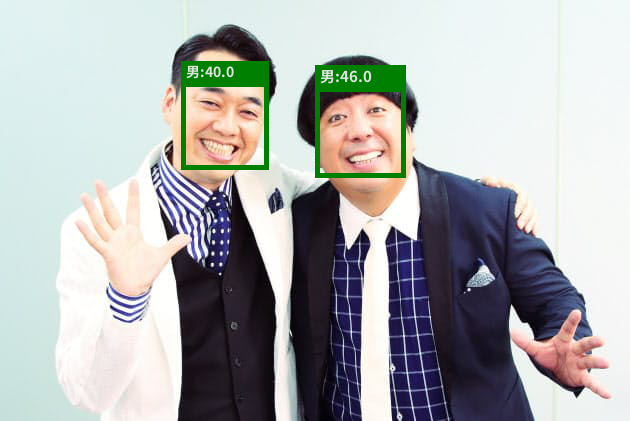

In [83]:
import requests
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import io

KEY = "3093cf2f7b3a4ebba43b0d76a5501527"
ENDPOINT = "https://20220116sakurai.cognitiveservices.azure.com/"

assert KEY

face_api_url = ENDPOINT + 'face/v1.0/detect'

#font = ImageFont.truetype("arial.ttf", 20)

#今後修正したいこと。画像のサイズによって文字がはみ出てしまうことがある。
#文字の大きさを相対的にしたい。あるいは、画像を無理やり大きくする
#背景が白いと、テキストが読みづらい。


img_url = "https___imgix-proxy.n8s.jp_DSXZZO0670050031082016000000-PB1-24.jpg"

img = Image.open(img_url)

with io.BytesIO() as output:
    img.save(output, format="JPEG")
    binary_img = output.getvalue() #バイナリ取得
    
headers = {
    "Content-Type": "application/octet-stream",
    "Ocp-Apim-Subscription-Key": KEY
}

params = {
    "returnFaceId": "true",
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)
results = res.json()

#rect = result[0]['faceRectangle']

draw = ImageDraw.Draw(img)

GENDER_JP = {
    "female": "女",
    "male" : "男"
}

for result in results:
    rect = result['faceRectangle']
    font = ImageFont.truetype("GenShinGothic-Bold.ttf", int(float(rect["width"])*0.17))
    text = GENDER_JP[result['faceAttributes']["gender"]]+ ":" + str(result['faceAttributes']["age"])
    draw.rectangle([(rect["left"], rect["top"]),(rect["left"]+rect["width"], rect["top"]+rect["height"])], fill=None, outline="green", width=5)
    draw.rectangle([(rect["left"], float(rect["top"])*0.75),(rect["left"]+rect["width"], rect["top"])] , fill = "green", outline="green")
    draw.text((rect["left"]+5, float(rect["top"])*0.75), text ,(225,225,225),font=font)
    
img

In [73]:
img.save("bananaman.jpg")

In [79]:
import io

In [81]:
with io.BytesIO() as output:
    img.save(output, format="JPEG")
    binary_img = output.getvalue() #バイナリ取得

ValueError: unknown file extension: 